In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5, )),
                              ])
# Download and load the training data
trainset = datasets.MNIST('./pytorch_실습/data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)
for input, target in dataset:
    optimizer.zero_grad()
    ouptput = model(input)
    loss = nn.CrossEntropyLoss(output,target)
    loss.backward()
    optimizer.step()
    

In [5]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 10
print('Model Training.......')
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        # gradient 계산
        # parameter update
        
        running_loss += loss.item()
    else:
        print(f"No.{e} : Training loss: {running_loss/len(trainloader)}")

Model Training.......
No.0 : Training loss: 0.6313872154015722
No.1 : Training loss: 0.2785088678698804
No.2 : Training loss: 0.22003581363366229
No.3 : Training loss: 0.17918225991398667
No.4 : Training loss: 0.15015771506088121
No.5 : Training loss: 0.1313099176950578
No.6 : Training loss: 0.11530222236685185
No.7 : Training loss: 0.1032592392057927
No.8 : Training loss: 0.09286057113060184
No.9 : Training loss: 0.08451955017151196


In [6]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    
    ax2.set_yticklabels(np.arange(10))
    
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

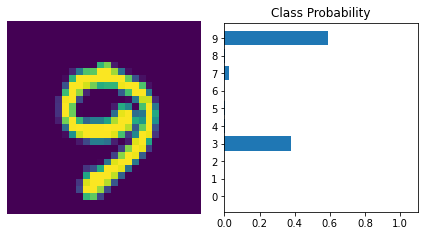

In [18]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5, )),
                              ])
# Download and load the training data
trainset = datasets.MNIST('./pytorch_실습/data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs =10

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        
        output = model(images)
        
        loss = criterion(images,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
    else :
        print(f"no.{e} : Train")
        